# Requirement: Replicate assignment 7 in Python.

In [77]:
# initial set up

import matplotlib.pyplot as plt
import seaborn as sns

sns.reset_orig()
my_palette = sns.color_palette("colorblind")
plt.style.use('seaborn-v0_8-colorblind')
%matplotlib inline

In [79]:
import os
import pandas as pd

# Set working directory
os.chdir(r"C:/Users/tsuji/Dropbox/study/UoL/ST2195 Programming for Data Science/lecture7/st2195_assignment_7")

# Read CSV file
titanic = pd.read_csv("titanic.csv")

# Check NaN
print(titanic.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [80]:
# Found 177 NA in Age value. We remove them before proceeding further. 
# This removal reduces the data size to 714 from 891.

# Remove rows with missing Age values
titanic_cleaned = titanic[titanic['Age'].notna()]

# Recheck NaN
print(titanic_cleaned.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          529
Embarked         2
dtype: int64


# Q1. Generate a series of bar charts to describe the gender, ticket class and survival of the passengers onboard.

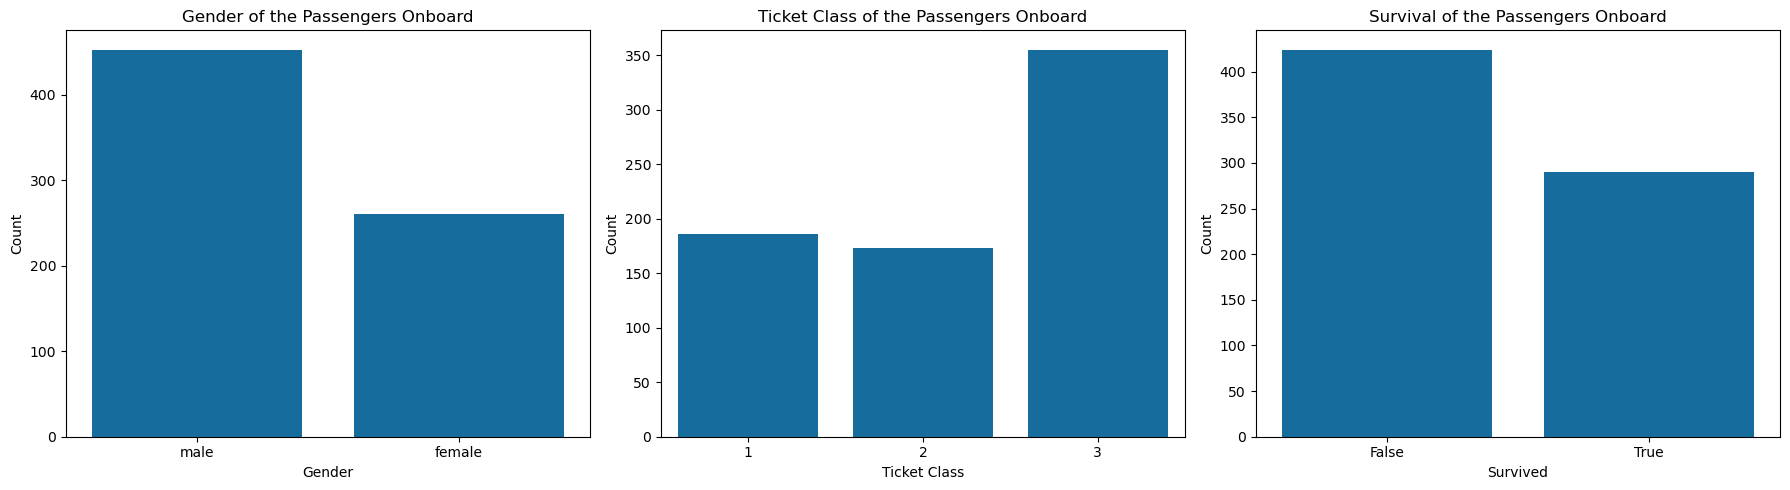

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# 1. Gender of the Passengers Onboard
sns.countplot(data=titanic_cleaned, x='Sex', ax=axs[0])
axs[0].set_title("Gender of the Passengers Onboard")
axs[0].set_xlabel("Gender")
axs[0].set_ylabel("Count")

# 2. Ticket Class of the Passengers Onboard
sns.countplot(data=titanic_cleaned, x='Pclass', ax=axs[1])
axs[1].set_title("Ticket Class of the Passengers Onboard")
axs[1].set_xlabel("Ticket Class")
axs[1].set_ylabel("Count")

# 3. Survival of the Passengers Onboard
survival_labels = titanic_cleaned['Survived'].map({0: "False", 1: "True"}) # Convert Survived column to string labels
sns.countplot(x=survival_labels, ax=axs[2])
axs[2].set_title("Survival of the Passengers Onboard")
axs[2].set_xlabel("Survived")
axs[2].set_ylabel("Count")

plt.tight_layout()
plt.show()

# 2. Generate a histogram for the passengers’ age. Furthermore, describe the passengers’ age using the following two boxplots: age per ticket class and age based on survival.

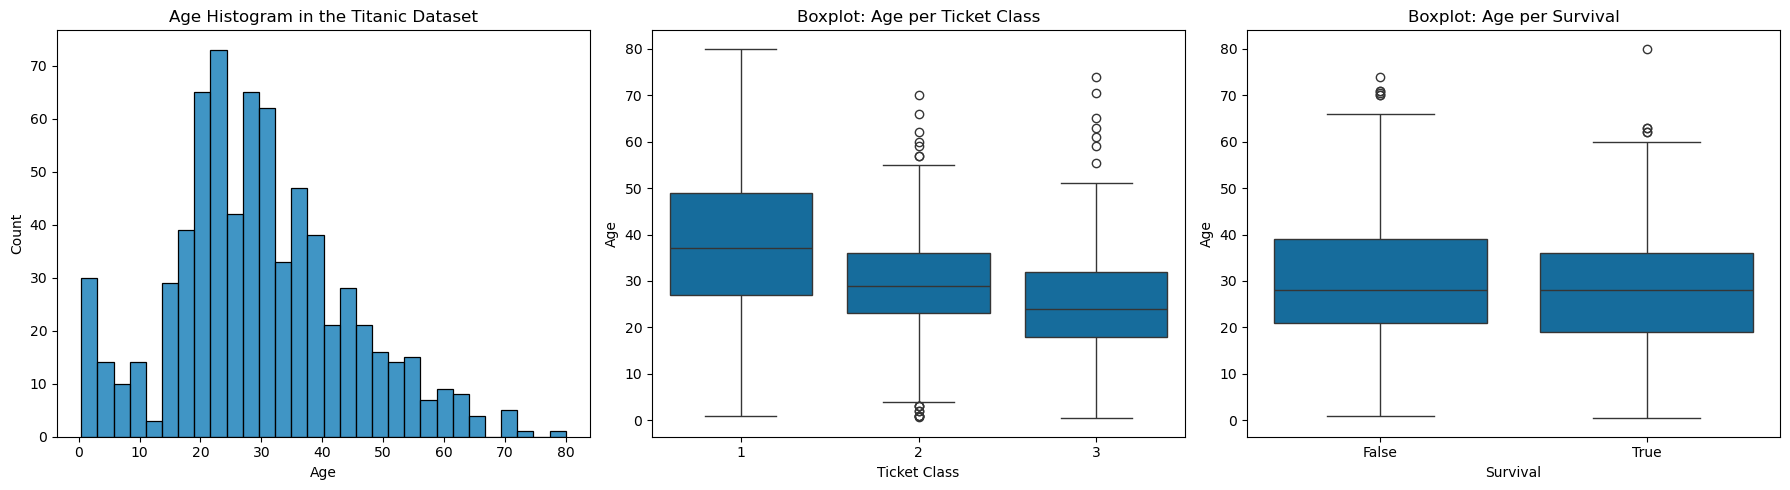

In [95]:

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# 1. Age Histogram
sns.histplot(data=titanic_cleaned, x='Age', bins=30, ax=axs[0])
axs[0].set_title("Age Histogram in the Titanic Dataset")
axs[0].set_xlabel("Age")
axs[0].set_ylabel("Count")

# 2. Boxplot: Age per Ticket Class
sns.boxplot(data=titanic_cleaned, x='Pclass', y='Age', ax=axs[1])
axs[1].set_title("Boxplot: Age per Ticket Class")
axs[1].set_xlabel("Ticket Class")
axs[1].set_ylabel("Age")

# 3. Boxplot: Age per Survival
survival_labels = titanic_cleaned['Survived'].map({0: "False", 1: "True"})
sns.boxplot(x=survival_labels, y=titanic_cleaned['Age'], ax=axs[2])
axs[2].set_title("Boxplot: Age per Survival")
axs[2].set_xlabel("Survival")
axs[2].set_ylabel("Age")

plt.tight_layout()
plt.show()

# 3. Generate a histogram for the travel fare and a table showing the number of people who did not pay – you may want to check on Google why a handful of people was on board for free!

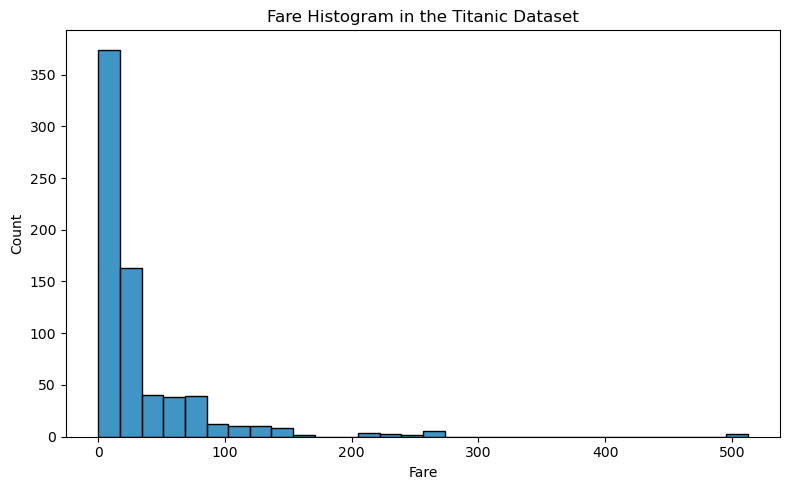

In [83]:
plt.figure(figsize=(8, 5))
sns.histplot(data=titanic_cleaned, x='Fare', bins=30)
plt.title("Fare Histogram in the Titanic Dataset")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [84]:
# Show them in table
breaks = [0, 0.01, 25, 50, 75, 100, 125, 150, float('inf')]
labels = ["£0", "£1–£25", "£26–£50", "£51–£75", "£76–£100", "£101–£125", "£126–£150", "> £150"]
Fare_bin = pd.cut(titanic_cleaned['Fare'], bins=breaks, labels=labels, right=False, include_lowest=True)
fare_pclass_table = pd.crosstab(Fare_bin, titanic_cleaned['Pclass'])
print(fare_pclass_table)

Pclass      1    2    3
Fare                   
£0          3    0    4
£1–£25      1  106  309
£26–£50    55   60   38
£51–£75    38    7    4
£76–£100   41    0    0
£101–£125  14    0    0
£126–£150   7    0    0
> £150     27    0    0


In fact, there were only 7 people on board for free. They would be either the ship crew or those who got the ticket as complimentary.
The table below shows the fares by ticket class. As expected, much people with low fare are in the 3rd class.
Researching it in Google, one explanation was that this is same as what we see in airplane nowadays (i.e. majority is in economy class).

# 4. A chart of your choice to describe the family size per ticket class.

In [100]:
# The values in SibSp column show the number of siblings and/or spouses a passenger had on titanic.
# The values in Parch column show the number of parents and/or children a passenger had on titanic.
# So we need to add them up (with +1 for the passenger himself/herself) for each ticket class.
data = titanic_cleaned.copy()
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
data['Pclass'] = data['Pclass'].map({1: "1st", 2: "2nd", 3: "3rd"})

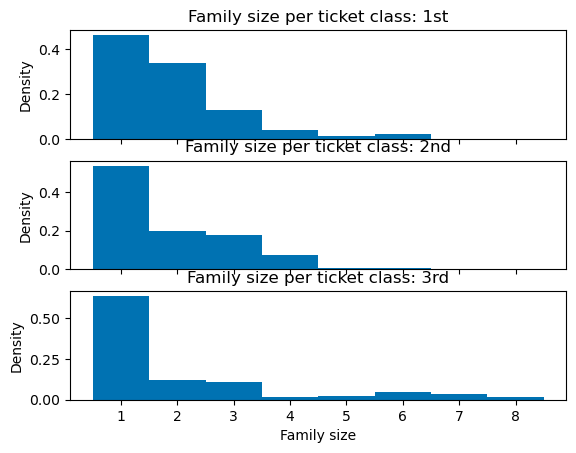

In [101]:
import numpy as np

fig, axes = plt.subplots(3, 1, sharex=True)
bins = np.arange(1, data['FamilySize'].max()+2) 
for i, cls in enumerate(["1st", "2nd", "3rd"]):
    sub = data[data['Pclass'] == cls]
    counts, bin_edges = np.histogram(sub['FamilySize'], bins=bins, density=True)
    axes[i].bar(bins[:-1], counts, width=1)
    axes[i].set_ylabel("Density")
    axes[i].set_title(f"Family size per ticket class: {cls}")

axes[-1].set_xlabel("Family size")
plt.show()

# 5. A series of stacked bar charts to show the how survival differs for different gender and ticket class.

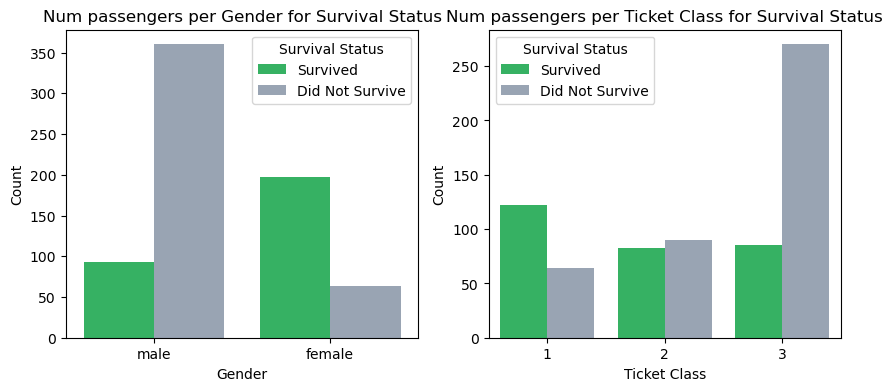

In [87]:
data = titanic_cleaned.copy()
data['SurvivalStatus'] = data['Survived'].map({1: "Survived", 0: "Did Not Survive"})

palette = {
    "Survived": "#22c55e",          # bright green
    "Did Not Survive": "#94a3b8"    # gray
}

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# 1. Num passengers per Gender for Survival Status
sns.countplot(data=data, x='Sex', hue='SurvivalStatus', hue_order=["Survived", "Did Not Survive"], ax=axs[0], palette=palette)
axs[0].set_title("Num passengers per Gender for Survival Status")
axs[0].set_xlabel("Gender")
axs[0].set_ylabel("Count")
axs[0].legend(title="Survival Status")

# 2. Num passengers per Ticket Class for Survival Status
sns.countplot(data=data, x='Pclass', hue='SurvivalStatus', hue_order=["Survived", "Did Not Survive"], ax=axs[1], palette=palette)
axs[1].set_title("Num passengers per Ticket Class for Survival Status")
axs[1].set_xlabel("Ticket Class")
axs[1].set_ylabel("Count")
axs[1].legend(title="Survival Status")

plt.show()


# 6. A violin chart describing how survival related to age and gender.

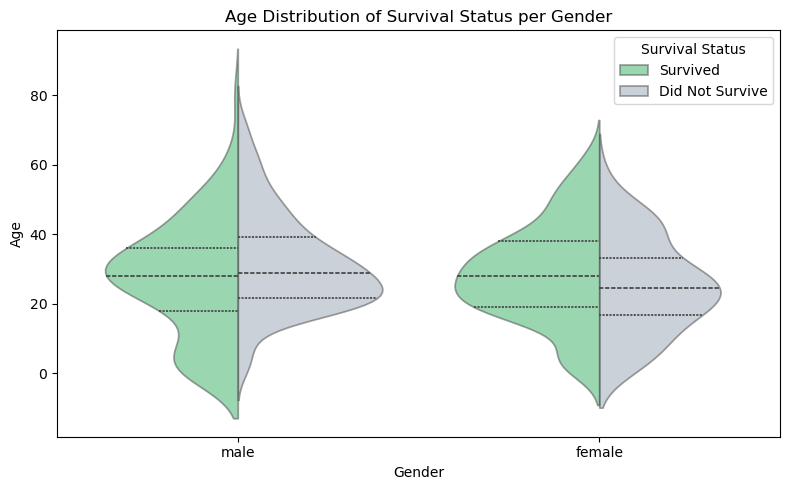

In [88]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=data, x="Sex", y="Age", hue="SurvivalStatus", hue_order=["Survived", "Did Not Survive"], split=True, inner="quartile", palette=palette, alpha=0.5)
plt.title("Age Distribution of Survival Status per Gender")
plt.xlabel("Gender")
plt.ylabel("Age")
plt.legend(title="Survival Status")
plt.tight_layout()
plt.show()

# 7. A violin chart describing the survival rate related to age and ticket class.

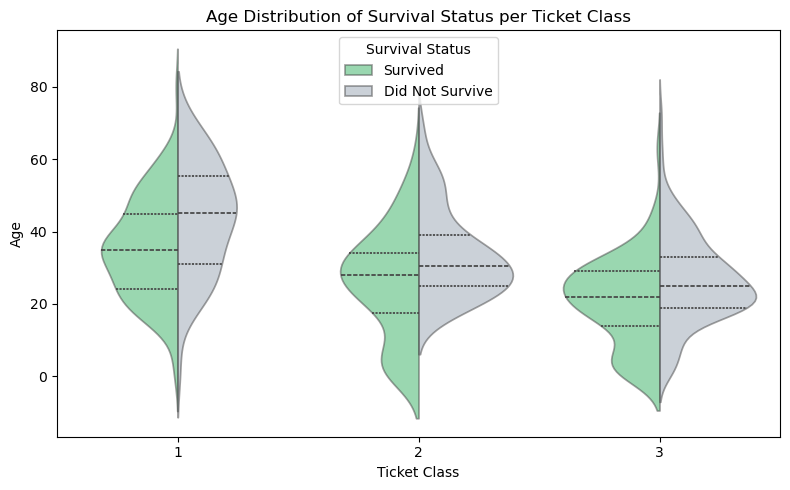

In [89]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=data, x="Pclass", y="Age", hue="SurvivalStatus", split=True, inner="quartile", hue_order=["Survived", "Did Not Survive"], palette=palette, alpha=0.5)
plt.title("Age Distribution of Survival Status per Ticket Class")
plt.xlabel("Ticket Class")
plt.ylabel("Age")
plt.legend(title="Survival Status")
plt.tight_layout()
plt.show()